In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from pysus.ftp.databases.sinan import SINAN
from ydata_profiling import ProfileReport

pysus_path = Path().resolve().parents[0] / "data" / "raw"
report_path = Path().resolve().parents[0] / "reports"
sinan = SINAN().load()  # Loads the files from DATASUS

In [2]:
def age_decoder(idade, unidade: str = "Y"):
    fator = {"Y": 1.0, "M": 12.0, "D": 365.0, "H": 365 * 24.0}
    idade = int(idade)
    if idade >= 4000:
        idade_anos = idade - 4000
    elif idade >= 3000 and idade < 4000:
        idade_anos = (idade - 3000) / 12.0
    elif idade >= 2000 and idade < 3000:
        idade_anos = (idade - 2000) / 365.0
    elif idade >= 1000 and idade < 2000:
        idade_anos = (idade - 1000) / (365 * 24.0)
    else:
        idade_anos = np.nan
    idade_dec = idade_anos * fator[unidade]
    return idade_dec

In [3]:
files = sinan.get_files(
    dis_code=["DENG"],
    year=[
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020,
        2021,
        2022,
        2023,
        2024,
    ],
)
sinan.download(files, local_dir=str(pysus_path))

100%|██████████| 300M/300M [00:00<00:00, 121GB/s]


[/Users/guttofranca/Repos/dq-sus/data/raw/DENGBR03.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR04.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR05.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR06.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR07.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR08.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR09.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR10.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR11.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR12.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR13.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR14.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR15.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR16.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR17.parquet,
 /Users/guttofranca/Repos/dq-sus/data/raw/DENGBR18.parquet,
 /Users/guttofranca/Repos/dq-sus/data/ra

In [4]:
years = range(3, 24)
data_frames = {}

for year in years:
    try:
        if year < 10:
            file_path = pysus_path / f"DENGBR0{year}.parquet"
        else:
            file_path = pysus_path / f"DENGBR{year}.parquet"
        
        # Nome dinâmico para cada dataframe
        df_name = f"df{year:02}"
        globals()[df_name] = pd.read_parquet(file_path)
        
        print(f"Data for year {year} loaded into {df_name}!")
    except FileNotFoundError:
        print(f"Data for year {year} not found!")
    except Exception as e:
        print(f"An error occurred while loading data for year {year}: {e}")

Data for year 3 loaded into df03!
Data for year 4 loaded into df04!
Data for year 5 loaded into df05!
Data for year 6 loaded into df06!
Data for year 7 loaded into df07!
Data for year 8 loaded into df08!
Data for year 9 loaded into df09!
Data for year 10 loaded into df10!
Data for year 11 loaded into df11!
Data for year 12 loaded into df12!
Data for year 13 loaded into df13!
Data for year 14 loaded into df14!
Data for year 15 loaded into df15!
Data for year 16 loaded into df16!
Data for year 17 loaded into df17!
Data for year 18 loaded into df18!
Data for year 19 loaded into df19!
Data for year 20 loaded into df20!
Data for year 21 loaded into df21!
Data for year 22 loaded into df22!
Data for year 23 loaded into df23!


In [17]:
dfs = [df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23]
anos = list(range(2003, 2024))

info = []

for i, df in enumerate(dfs):
    linhas = df.shape[0]
    colunas = df.shape[1]
    info.append({'Ano': anos[i], 'Linhas': linhas, 'Colunas': colunas})

df_info = pd.DataFrame(info)

df_info.to_csv(report_path / "info.csv", index=False)

In [15]:
df03.shape[1]

107

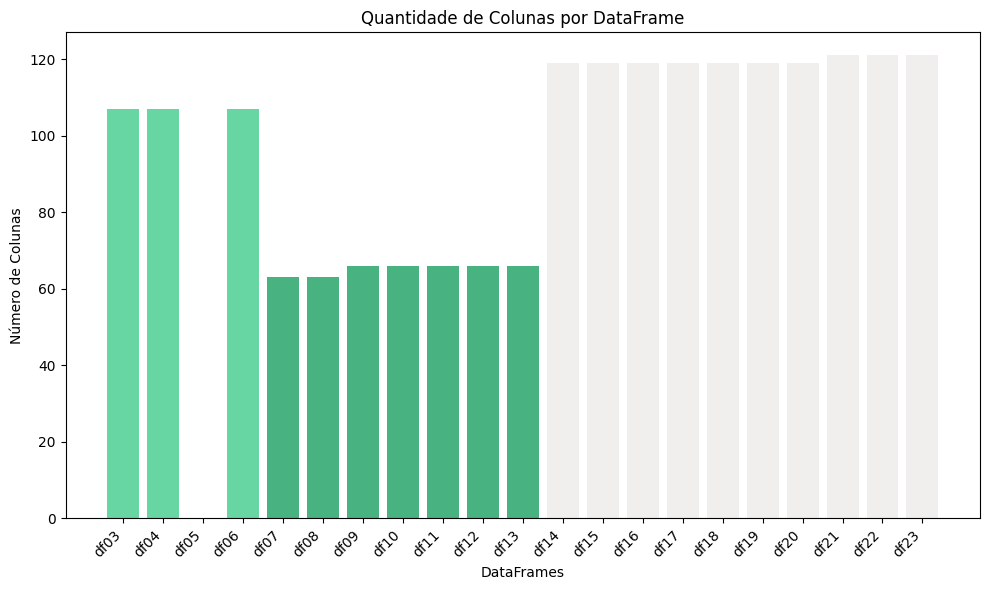

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de dataframes e cores fornecidas
dfs = [df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23]
colors = ['#48B281', '#68D6A3', '#F1EEEE']

# Nomes dos dataframes para o gráfico
df_names = [f"df{str(i).zfill(2)}" for i in range(3, 24)]

# Contagem de colunas de cada dataframe
col_counts = [df.shape[1] for df in dfs]

# Definindo cores de acordo com a condição fornecida
bar_colors = []
for count in col_counts:
    if 0 <= count <= 70:
        bar_colors.append(colors[0])
    elif 71 <= count <= 118:
        bar_colors.append(colors[1])
    else:
        bar_colors.append(colors[2])

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df_names, col_counts, color=bar_colors)

# Adicionando título e rótulos
plt.title('Quantidade de Colunas por DataFrame')
plt.xlabel('DataFrames')
plt.ylabel('Número de Colunas')

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
from matplotlib import pyplot as plt

years_with_data = list(data_frames.keys())
num_columns = [len(df.columns) for df in data_frames.values()]

colors = ['#48B281', '#68D6A3', '#F1EEEE']

plt.figure(figsize=(12, 7))

for i, year in enumerate(years_with_data):
    if 7 <= num_columns[i] <= 9:
        color = colors[0]
    elif 10 <= num_columns[i] <= 11:
        color = colors[1]
    else:
        color = colors[2]
    plt.bar(year, num_columns[i], color=color, edgecolor=colors[2])

plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Colunas', fontsize=14)
plt.title('Número de Colunas em Cada DataFrame por Ano', fontsize=16)
plt.xticks(years_with_data, rotation=45)
plt.grid(axis='y', linestyle='--', color=colors[2], alpha=0.7)

plt.legend(['7-9 Colunas', '10-11 Colunas', 'Acima de 11 Colunas'], loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/kc/y5hh5_bn22j6r537j07tch180000gn/T/ipykernel_7643/491881542.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [12]:
df03.shape[1]

107